In [27]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [47]:
# Target User Account
target_user = ["@BBC","@CBS",'@nytimes', '@CNN', '@FoxNews']

# Variables for holding results
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []
date_list = []
text_list=[]
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
       
    for user in target_user:
    
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            user_list.append(user)
            date_list.append(tweet["created_at"])
            text_list.append(tweet['text'])
#print(tweet)

In [48]:
df = pd.DataFrame({"user": user_list, 
              "date": date_list, 
              "compound": compound_list, 
              "positive": positive_list, 
              "negative": negative_list, 
              "neutral": neutral_list,
                  "text":text_list})
                 

In [49]:
df["date"] = pd.to_datetime(df["date"])

In [51]:
df.head(20)

,user,date,compound,positive,negative,neutral,text
0,@BBC,2018-09-29 20:32:03,0.4215,0.257,0.000,0.743,Chile has launched a huge hiking route through...
1,@BBC,2018-09-29 17:02:12,0.4215,0.135,0.000,0.865,🐣😍 Conservationists have been monitoring the p...
2,@BBC,2018-09-29 16:01:07,-0.7003,0.000,0.293,0.707,'My children bought back the car I sold to pay...
3,@BBC,2018-09-29 15:54:38,0.5499,0.129,0.000,0.871,RT @BBCEngland: Benny the beluga whale is spen...
4,@BBC,2018-09-29 15:02:04,0.7088,0.329,0.000,0.671,Always start by playing paper! 👊✋✌️\n\nThis is...
5,@BBC,2018-09-29 14:03:07,0.0000,0.000,0.000,1.000,'What do I know her from again?' 🤔📺\n\nThese a...
6,@BBC,2018-09-29 13:01:07,-0.5256,0.000,0.253,0.747,This is the world's most dangerous city to be ...
7,@BBC,2018-09-29 11:03:02,-0.1860,0.156,0.227,0.616,"""New York City is underwhelming"". 😳😳😳\n \n#Unp..."
8,@BBC,2018-09-29 10:03:05,0.4939,0.181,0.000,0.819,What's it like growing up with tourettes?\n\nB...
9,@BBC,2018-09-29 09:01:02,-0.5267,0.000,0.254,0.746,This school became a national leader by focusi...


In [6]:
# Print the Averages
print(f"User: {user}")
print(f"Compound: {np.mean(compound_list):.3f}")
print(f"Positive: {np.mean(positive_list):.3f}")
print(f"Neutral: {np.mean(neutral_list):.3f}")
print(f"Negative: {np.mean(negative_list):.3f}")

User: @FoxNews
Compound: 0.031
Positive: 0.080
Neutral: 0.850
Negative: 0.070


In [7]:
bbc_df = df[df["user"] == "@BBC"]
cnn_df = df[df["user"] == "@CNN"]
cbs_df = df[df["user"] == "@CBS"]
foxnews_df = df[df["user"] == "@FoxNews"]
nytimes_df = df[df["user"] == "@nytimes"]

In [8]:
# np.arange(start, end, incr)
bbc_index = np.arange(-len(bbc_df), 0, 1)
cnn_index = np.arange(-len(cnn_df), 0, 1)
cbs_index = np.arange(-len(cbs_df), 0, 1)
foxnews_index = np.arange(-len(foxnews_df), 0, 1)
nytimes_index = np.arange(-len(nytimes_df), 0, 1)

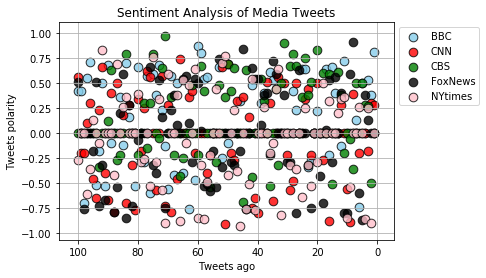

In [9]:
plt.scatter(bbc_index, bbc_df["compound"], 
            edgecolor="black", linewidths=1, 
            marker="o", color="skyblue", s=75, 
            alpha=0.8, label="BBC")

plt.scatter(cnn_index, cnn_df["compound"], 
            edgecolor="black", linewidths=1, 
            marker="o", color="red", s=75, 
            alpha=0.8, label="CNN")
plt.scatter(cbs_index, cbs_df["compound"], 
            edgecolor="black", linewidths=1, 
            marker="o", color="green", s=75, 
            alpha=0.8, label="CBS")
plt.scatter(foxnews_index, foxnews_df["compound"], 
            edgecolor="black", linewidths=1, 
            marker="o", color="black", s=75, 
            alpha=0.8, label="FoxNews")
plt.scatter(nytimes_index, nytimes_df["compound"], 
            edgecolor="black", linewidths=1, 
            marker="o", color="pink", s=75, 
            alpha=0.8, label="NYtimes")

plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.xlabel("Tweets ago")
plt.ylabel("Tweets polarity")
plt.title("Sentiment Analysis of Media Tweets")
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.savefig("Sentiment analysis")

In [10]:
compound=(np.mean(bbc_df["compound"]),np.mean(cbs_df["compound"]),
         np.mean(nytimes_df["compound"]),np.mean(cnn_df["compound"]),np.mean(foxnews_df["compound"]))

In [11]:
print(compound)

(0.13208000000000003, 0.14171299999999998, -0.06033300000000001, -0.031444, -0.024546999999999996)


In [12]:
# dataFrame
compound_data=pd.DataFrame({"User":target_user,
                      "Compound":compound})

compound_data

,User,Compound
0,@BBC,0.132080
1,@CBS,0.141713
2,@nytimes,-0.060333
3,@CNN,-0.031444
4,@FoxNews,-0.024547


<function matplotlib.pyplot.show(*args, **kw)>

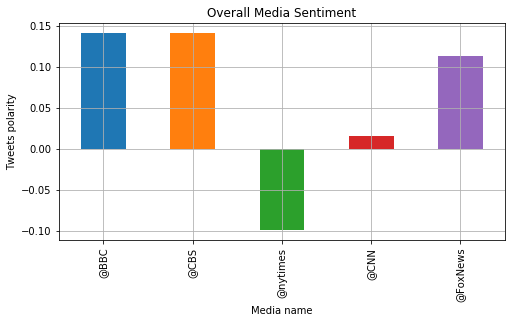

In [184]:
compound_data.plot(x="User",y="Compound",kind="bar",figsize=(8,4),legend=False)
plt.grid(True)
plt.xlabel("Media name")
plt.ylabel("Tweets polarity")
plt.title("Overall Media Sentiment")


plt.savefig("Overall Sentiment")
plt.show

In [ ]:
#Summary:
#1.Based on plot 1,almost all media sourses have all kinds of sentiments.
#2.NY Times has the most negative sentiments
#3. BBC and CBS have most positive sentiments